In [3]:
# K- nearest neighbor(KNN):
#     in this  there are various categories from which we have to find the particular point belong to which category
# for this there are two ways in which we can calculate the distance from that point to the categories 
# 1)Eucledin distance 
# formula: ed = underR[(x2-x1)^2+ (y2-y1)^2]
# 2) manhatlan distance

# if the point has maximum categories of 1 then it belong to 1 category
# if the point has maximum category of 2 then it belong to 2 category

In [4]:
# You've been given a classified data set from a company! 
# They've hidden the feature column names but have given you the data and the target classes.
# We'll 
# try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv('Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
# Standardize the varible as there must be different unit in dataset therefore sacling the it to normal scale

In [10]:
from sklearn.preprocessing import StandardScaler


In [24]:
scale_feature = StandardScaler()
scale_feature.fit(df.iloc[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scale_f = scale_feature.transform(df.iloc[:,:-1])

In [28]:
df_feat = pd.DataFrame(scale_f,columns= df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scale_f,df['TARGET CLASS'],test_size=0.30)

In [30]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kN = KNeighborsClassifier(n_neighbors=1)

In [33]:
kN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
k_predict = kN.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
confusion_matrix(y_test,k_predict)

array([[125,  16],
       [ 14, 145]])

In [39]:
print(classification_report(y_test,k_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       141
           1       0.90      0.91      0.91       159

   micro avg       0.90      0.90      0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [43]:
# choosing the k value
error_rate = []

for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Value')

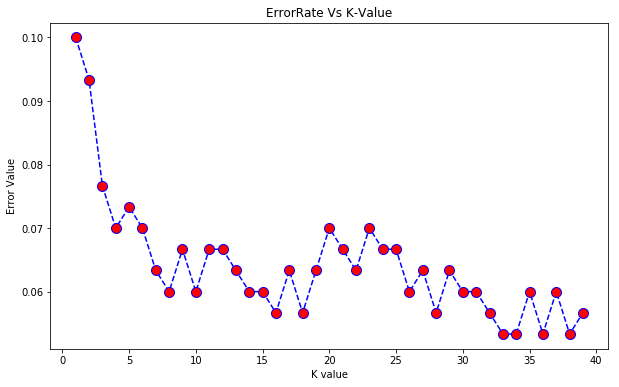

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('ErrorRate Vs K-Value')
plt.xlabel('K value')
plt.ylabel('Error Value')

In [46]:
# now taking k  value 27
kn = KNeighborsClassifier(n_neighbors=27)
kn.fit(X_train,y_train)
pred = kn.predict(X_test)

In [47]:
print("with k value 27")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

with k value 27


[[128  13]
 [  6 153]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       141
           1       0.92      0.96      0.94       159

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

